In [1]:
# Import libraries
from datasets import load_dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
dataset = load_dataset("stanfordnlp/imdb")
df = pd.DataFrame(dataset['train'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
# Vectorize for dimension reduction
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['text'])

In [4]:
# Dimension reduction: PCA to 2 components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

In [5]:
# Create DF for EDA
df_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_reduced['label'] = df['label']


In [6]:
# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.07281003 0.06479053]


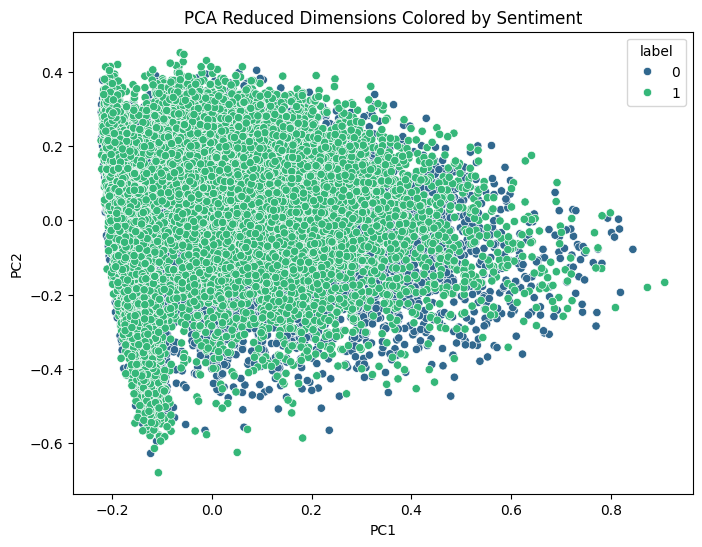

In [7]:
# EDA Visualization: Scatter plot of reduced dimensions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_reduced, palette='viridis')
plt.title('PCA Reduced Dimensions Colored by Sentiment')
plt.show()